#  Global Poverty & Inequality Analysis
### By Marcus L. Wright | Internship Portfolio Project

Using World Bank data to explore income inequality and poverty trends across regions. This project highlights policy-relevant analytics, cross-country comparisons, and Python-powered insights aligned with global development goals.

In [197]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Leave\OneDrive\Desktop\WorldBank_PovertyProject\WorldBank-Proverty_Analysis_MarcusWright.csv",skiprows=4)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,Annualized average growth rate in per capita r...,SI.SPR.PCAP.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,"Survey mean consumption or income per capita, ...",SI.SPR.PCAP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Annualized average growth rate in per capita r...,SI.SPR.PC40.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Survey mean consumption or income per capita, ...",SI.SPR.PC40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,Poverty gap at $8.30 a day (2021 PPP) (%),SI.POV.UMIC.GP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
poverty_gap = df[df["Indicator Name"].str.contains("Poverty gap", na=False)]

In [201]:
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)
df_long["Year"] = df_long["Year"].astype(int)

In [203]:
df_long.groupby("Country Name")["Value"].count().sort_values(ascending=False).head(10)

Country Name
United States     933
United Kingdom    830
Canada            678
Costa Rica        602
Brazil            601
Italy             592
Luxembourg        589
Argentina         551
Indonesia         522
Poland            517
Name: Value, dtype: int64

In [205]:

gdp_growth = df[df["Indicator Name"].str.contains("GDP growth", case=False, na=False)]


poverty_rate = df[df["Indicator Name"].str.contains("Poverty headcount", case=False, na=False)]

In [207]:
gdp_df = df[df["Indicator Name"].str.contains("GDP growth", case=False, na=False)]

In [209]:
gdp_long = gdp_df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)
gdp_long["Year"] = gdp_long["Year"].astype(int)
gdp_long.dropna(subset=["Value"], inplace=True)

In [211]:
selected_countries = ["India", "United States", "Brazil"]

gdp_filtered = gdp_long[gdp_long["Country Name"].isin(selected_countries)]

In [213]:
poverty_df = df[df["Indicator Name"] == "Poverty headcount ratio at national poverty lines (% of population)"]

In [215]:
poverty_long = poverty_df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)
poverty_long["Year"] = poverty_long["Year"].astype(int)
poverty_long["Value"] = pd.to_numeric(poverty_long["Value"], errors="coerce")
poverty_long.dropna(subset=["Value"], inplace=True)

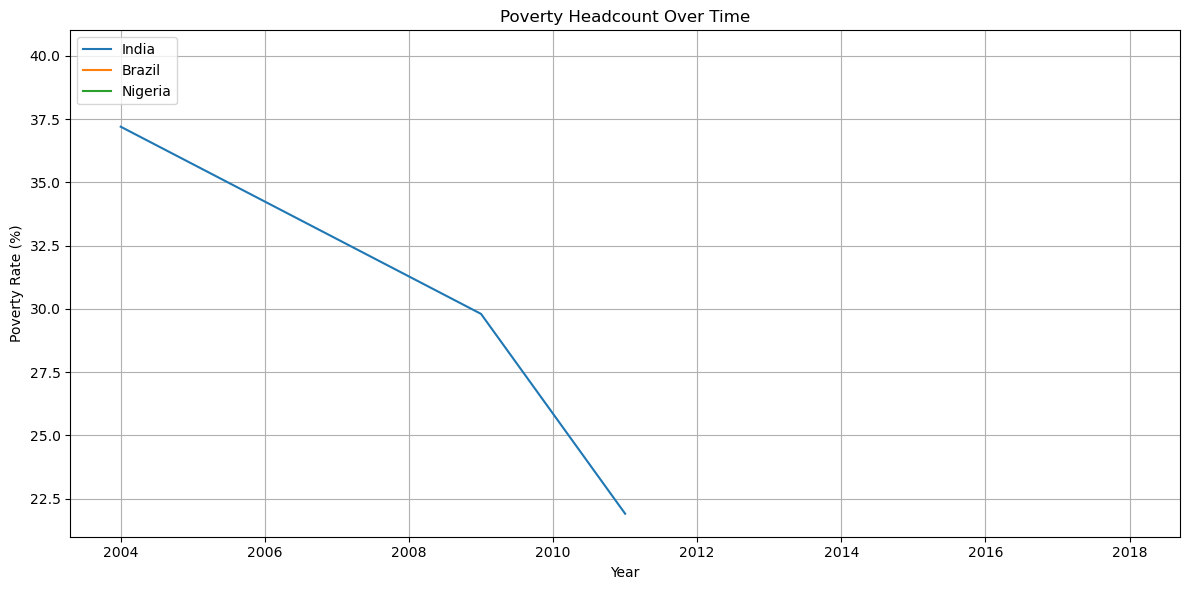

In [217]:
selected_countries = ["India", "Brazil", "Nigeria"]
poverty_filtered = poverty_long[poverty_long["Country Name"].isin(selected_countries)]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = poverty_filtered[poverty_filtered["Country Name"] == country]
    plt.plot(country_data["Year"], country_data["Value"], label=country)

plt.title("Poverty Headcount Over Time")
plt.xlabel("Year")
plt.ylabel("Poverty Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

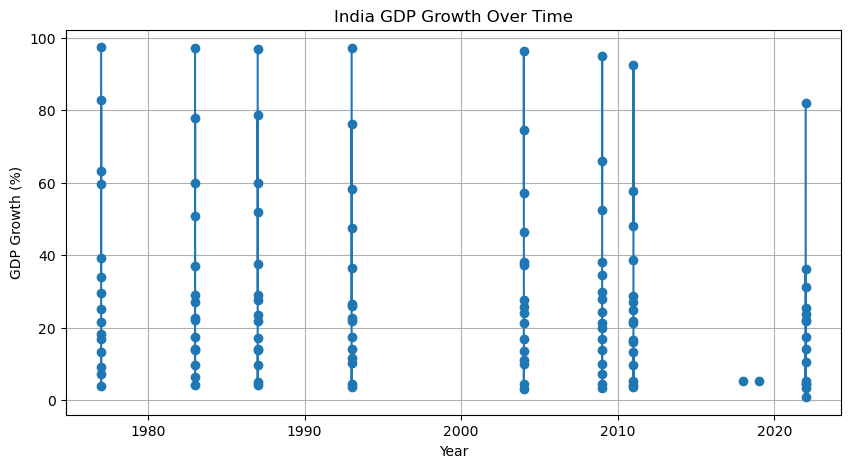

In [219]:
import matplotlib.pyplot as plt

# Example: Plot GDP growth for India
india_gdp = df_long[df_long["Country Name"] == "India"]

plt.figure(figsize=(10, 5))
plt.plot(india_gdp["Year"], india_gdp["Value"], marker='o')
plt.title("India GDP Growth Over Time")
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.grid(True)
plt.show()

In [221]:
print(df["Indicator Name"].unique())

['Annualized average growth rate in per capita real survey mean consumption or income, total population (%)'
 'Survey mean consumption or income per capita, total population (2021 PPP $ per day)'
 'Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)'
 'Survey mean consumption or income per capita, bottom 40% of population (2021 PPP $ per day)'
 'Poverty gap at $8.30 a day (2021 PPP) (%)'
 'Poverty headcount ratio at $8.30 a day (2021 PPP) (% of population)'
 'Poverty headcount ratio at national poverty lines (% of population)'
 'Poverty gap at $4.20 a day (2021 PPP) (%)'
 'Poverty headcount ratio at $4.20 a day (2021 PPP) (% of population)'
 'Gini index' 'Poverty gap at $3.00 a day (2021 PPP) (%)'
 'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)'
 'Income share held by lowest 20%' 'Income share held by lowest 10%'
 'Proportion of people living below 50 percent of median income (%)'
 'Income share held by

In [223]:
poverty_df = df[df['Indicator Name'].str.contains('Poverty headcount', case=False, na=False)].copy()

In [225]:
poverty_long = poverty_df.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=[str(year) for year in range(1981, 2024)],
    var_name='year',
    value_name='poverty_rate'
)
poverty_long.dropna(subset=['poverty_rate'], inplace=True)
poverty_long['year'] = poverty_long['year'].astype(int)

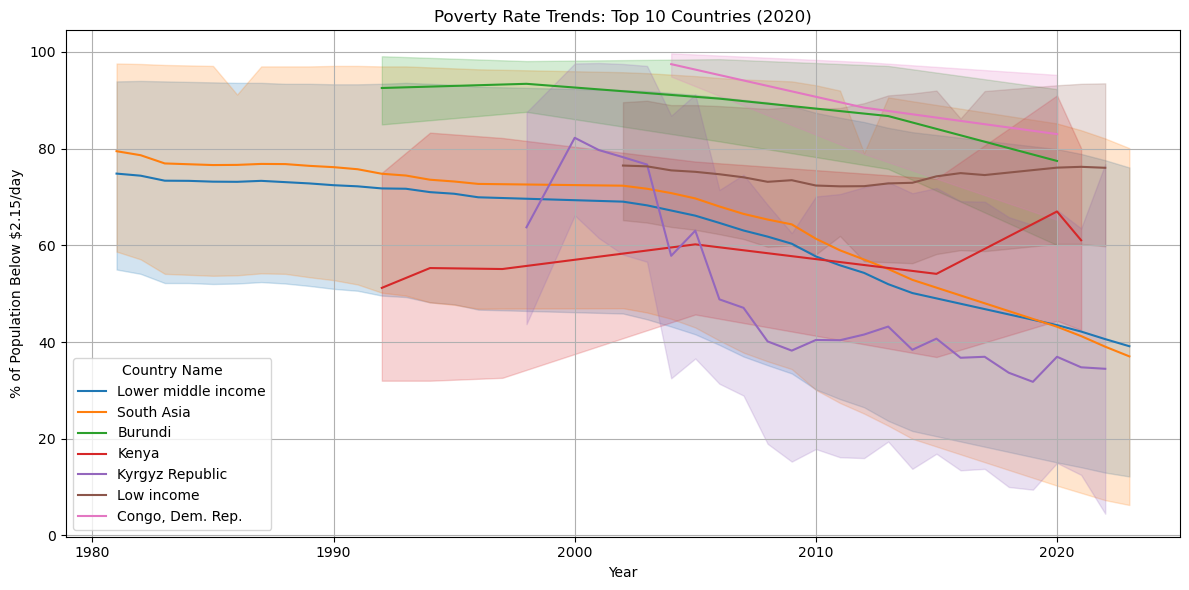

In [227]:
latest_year = poverty_long[poverty_long['year'] == 2020]
top10_countries = latest_year.sort_values(by='poverty_rate', ascending=False).head(10)['Country Name'].unique()

filtered_df = poverty_long[poverty_long['Country Name'].isin(top10_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_df, x='year', y='poverty_rate', hue='Country Name')
plt.title('Poverty Rate Trends: Top 10 Countries (2020)')
plt.ylabel('% of Population Below $2.15/day')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [228]:
country_to_region = {
    'Nigeria': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'India': 'South Asia',
    'Bangladesh': 'South Asia',
    'Pakistan': 'South Asia',
    'China': 'East Asia',
    'Indonesia': 'Southeast Asia',
    'Philippines': 'Southeast Asia',
    'Brazil': 'Latin America',
    'Mexico': 'Latin America',
    'United States': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'France': 'Europe',
    'South Africa': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Vietnam': 'Southeast Asia',
    'Russia': 'Europe',
    'Egypt': 'Middle East & North Africa',
    'Turkey': 'Middle East & North Africa',
    # Add more as needed...
}

In [229]:
poverty_long['region'] = poverty_long['Country Name'].map(country_to_region)

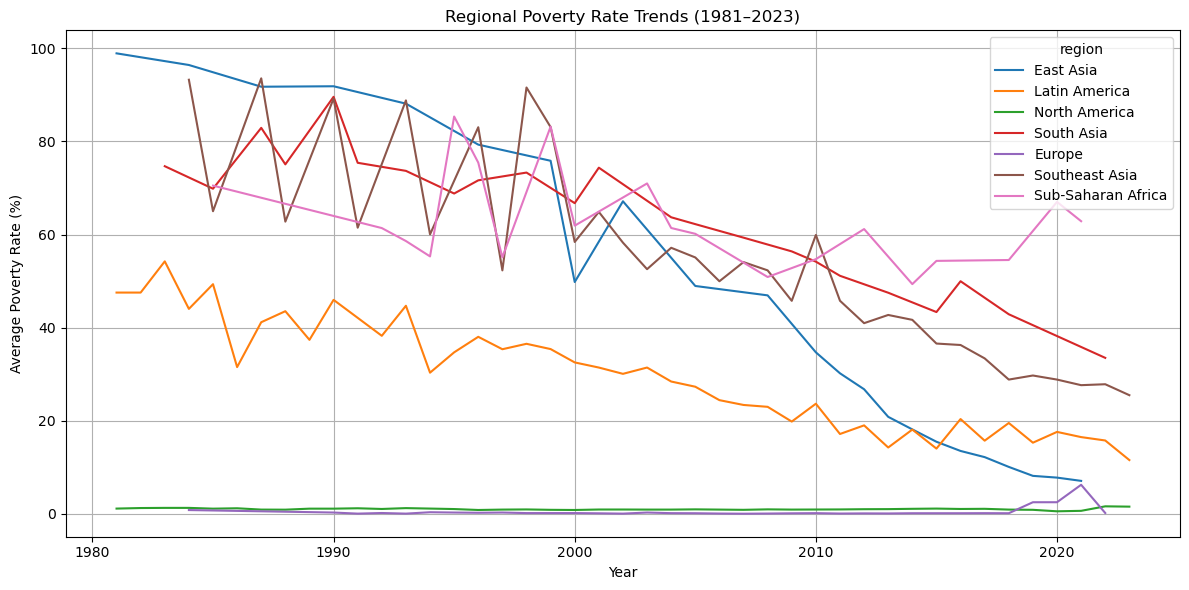

In [230]:
region_avg = poverty_long.groupby(['year', 'region'])['poverty_rate'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=region_avg, x='year', y='poverty_rate', hue='region')
plt.title('Regional Poverty Rate Trends (1981–2023)')
plt.ylabel('Average Poverty Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

## ARIMA Forecasting

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [233]:
# Filter for Nigeria and prep datetime index
country_df = poverty_long[poverty_long['Country Name'] == 'Nigeria'].copy()
country_df['year'] = pd.to_datetime(country_df['year'], format='%Y')
country_df.set_index('year', inplace=True)

In [237]:
# Fit ARIMA model
model = ARIMA(country_df['poverty_rate'], order=(1, 1, 1))
results = model.fit()

C:\Users\Leave\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leave\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leave\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leave\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [241]:
# Forecast next 5 years
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create future year index
last_year = country_df.index[-1].year
future_years = pd.date_range(start=f"{last_year+1}", periods=forecast_steps, freq='Y')

C:\Users\Leave\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Leave\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Leave\AppData\Local\Temp\ipykernel_3224\1961470620.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=f"{last_year+1}", periods=forecast_steps, freq='Y')


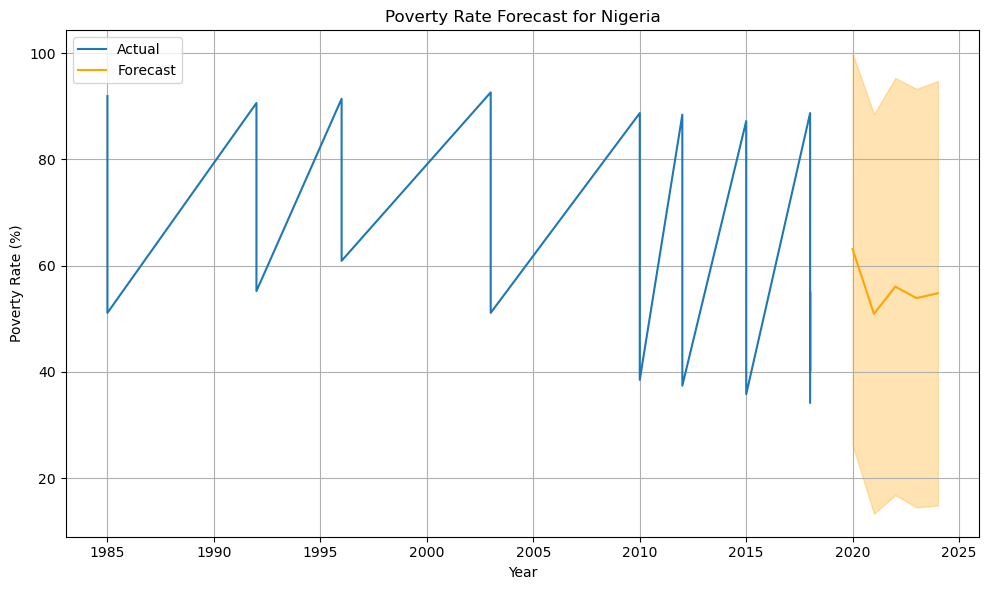

In [244]:
# Plot actuals and forecast
plt.figure(figsize=(10, 6))
plt.plot(country_df.index, country_df['poverty_rate'], label='Actual')
plt.plot(future_years, forecast_mean, label='Forecast', color='orange')
plt.fill_between(future_years, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Poverty Rate Forecast for Nigeria')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Inquality Metrics Module: Nigeria

## Gini Coefficient 

Headcount Ratio (H): 0.6667
Poverty Gap Index (PG): 0.2616
Gini Coefficient among the Poor (G_poor): 0.1791
Watts Index: 0.3773
Sen Index: 0.2626


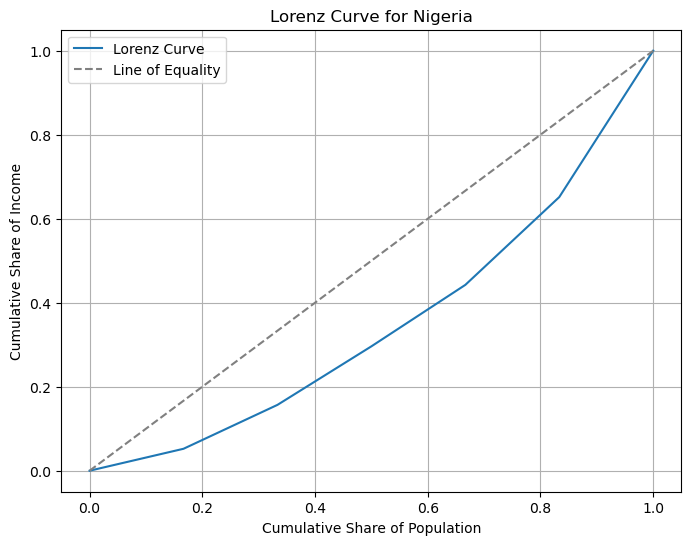

In [248]:
import numpy as np
import matplotlib.pyplot as plt

# Watts Index Function
def watts_index(income, poverty_line):
    income = np.array(income)
    poor = income[income < poverty_line]
    return np.mean(np.log(poverty_line / poor))

# Gini Function
def gini(array):
    array = np.sort(array)
    n = len(array)
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * array)) / (n * np.sum(array)) - (n + 1) / n

# Lorenz Curve Function
def lorenz_curve(data):
    sorted_data = np.sort(data)
    cum_data = np.cumsum(sorted_data)
    cum_data = np.insert(cum_data, 0, 0)
    cum_data = cum_data / cum_data[-1]
    x = np.linspace(0, 1, len(cum_data))
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, cum_data, label='Lorenz Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Line of Equality')
    plt.title('Lorenz Curve for Nigeria')
    plt.xlabel('Cumulative Share of Population')
    plt.ylabel('Cumulative Share of Income')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample Data
poverty_line = 2.15
income_data = np.array([1.50, 2.00, 3.00, 0.75, 2.10, 5.00])
income = income_data  # For consistency

# Metrics
H = np.mean(income < poverty_line)
PG = np.mean((poverty_line - income[income < poverty_line]) / poverty_line)
G_poor = gini(income[income < poverty_line])
watts = watts_index(income, poverty_line)
sen_index = H * (PG + (1 - PG) * G_poor)

# Output
print(f"Headcount Ratio (H): {H:.4f}")
print(f"Poverty Gap Index (PG): {PG:.4f}")
print(f"Gini Coefficient among the Poor (G_poor): {G_poor:.4f}")
print(f"Watts Index: {watts:.4f}")
print(f"Sen Index: {sen_index:.4f}")

# Visual
lorenz_curve(income_data)

In [250]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [251]:
import folium


m = folium.Map(location=[10, 0], zoom_start=2)

In [252]:
coords = pd.DataFrame({
    'Country Name': ['Nigeria', 'India', 'Brazil', 'United States'],
    'latitude': [9.0820, 20.5937, -14.2350, 37.0902],
    'longitude': [8.6753, 78.9629, -51.9253, -95.7129]
})

In [253]:
poverty_long = poverty_long.merge(coords, on='Country Name', how='left')

In [254]:
for _, row in poverty_long.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5 + row['poverty_rate'] * 0.2,  # size by severity
            color='red' if row['poverty_rate'] > 40 else 'orange' if row['poverty_rate'] > 20 else 'green',
            fill=True,
            fill_opacity=0.7,
            tooltip=folium.Tooltip(
                f"{row['Country Name']} ({row['region']})\nPoverty Rate: {row['poverty_rate']}%"
            )
        ).add_to(m)

In [255]:
m.save("poverty_map.html")